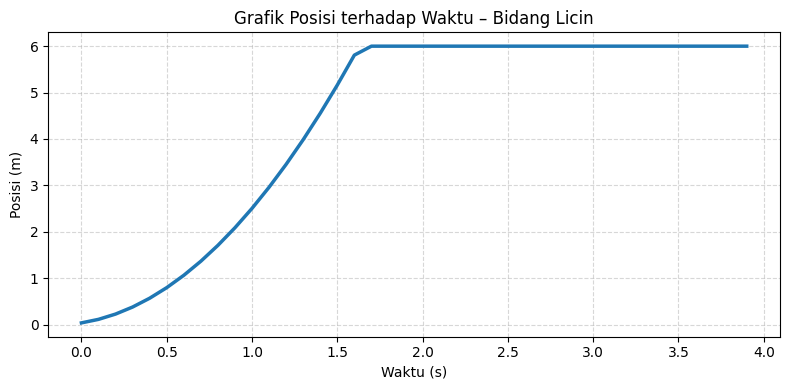

In [ ]:
# ==========================================================
# Matlee Arya Sadewa
# ==========================================================

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# ==========================================================
# PARAMETER FISIKA (LANTAI KERAMIK LICIN)
# ==========================================================
m = 14.0
g = 9.8
mu_k = 0.05        # KERAMIK LICIN

dt = 0.1
steps = 40

F_dorong = 60.0

# ==========================================================
# SIMULASI GERAK
# ==========================================================
x, v = 0.0, 0.0
positions = []

N = m * g
f_gesek = mu_k * N

x_min, x_max = -0.5, 6.0

for _ in range(steps):
    sumF = F_dorong - f_gesek
    if sumF < 0:
        sumF = 0

    a = sumF / m
    v += a * dt
    x += v * dt
    x = np.clip(x, x_min, x_max)

    positions.append(x)

# ==========================================================
# FUNGSI PANAH (PANJANG PROPORSIONAL)
# ==========================================================
def draw_arrow(ax, start, vec, scale, color):
    dx, dy = vec
    ax.arrow(start[0], start[1],
             dx*scale, dy*scale,
             head_width=0.12,
             head_length=0.18,
             linewidth=2.5,
             length_includes_head=True,
             color=color)

# ==========================================================
# ANIMASI
# ==========================================================
fig, ax = plt.subplots(figsize=(10,4))

def update(i):
    ax.clear()
    pos = positions[i]
    sumF = max(F_dorong - f_gesek, 0)
    a = sumF / m

    # --------------------
    # LANTAI KERAMIK
    # --------------------
    ax.plot([x_min-1, x_max+1], [-0.35, -0.35],
            color="black", linewidth=2)
    ax.text(x_min, -0.95, "Lantai keramik licin", fontsize=9)

    # --------------------
    # KURSI
    # --------------------
    ax.add_patch(Rectangle((pos-0.6, -0.3), 1.2, 0.6,
                           fill=False, linewidth=2.5))
    ax.text(pos, 1.05, "KURSI",
            ha="center", fontsize=11, weight="bold")

    # --------------------
    # FREE BODY DIAGRAM
    # --------------------
    draw_arrow(ax, (pos, 0.15), (0, 1), 0.6, "royalblue")     # N
    draw_arrow(ax, (pos, -0.15), (0, -1), 0.6, "crimson")    # W
    draw_arrow(ax, (pos-0.15, 0), (-1, 0), 0.25, "saddlebrown")  # f kecil
    draw_arrow(ax, (pos+0.15, 0), (1, 0), 0.6, "green")      # F dorong

    draw_arrow(ax, (pos, -0.75), (1, 0), 0.5, "purple")      # ΣF

    # --------------------
    # LABEL GAYA (AMAN)
    # --------------------
    ax.text(pos, 0.95, "N", color="royalblue", ha="center")
    ax.text(pos, -0.85, "W", color="crimson", ha="center")
    ax.text(pos-0.9, 0.1, "f (kecil)", color="saddlebrown", ha="center")
    ax.text(pos+0.9, 0.25, "F dorong", color="green", ha="center")
    ax.text(pos+0.9, -0.75, "ΣF", color="purple", ha="center")

    # --------------------
    # INFO BOX
    # --------------------
    ax.text(
        0.98, 0.95,
        f"μk = {mu_k}\nΣF = {sumF:.1f} N\na = {a:.2f} m/s²\nBidang licin",
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="black", alpha=0.95)
    )

    # --------------------
    # SETTING
    # --------------------
    ax.set_xlim(x_min-0.5, x_max+0.5)
    ax.set_ylim(-1.8, 1.8)
    ax.set_aspect("equal")
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.set_title("Hukum Newton II – Kursi di Lantai Keramik Licin")

ani = FuncAnimation(
    fig, update,
    frames=len(positions),
    interval=150,
    blit=False
)

plt.close(fig)
display(HTML(ani.to_jshtml()))

# ==========================================================
# GRAFIK POSISI vs WAKTU
# ==========================================================
time = np.arange(0, steps * dt, dt)

plt.figure(figsize=(8,4))
plt.plot(time, positions, linewidth=2.5)
plt.xlabel("Waktu (s)")
plt.ylabel("Posisi (m)")
plt.title("Grafik Posisi terhadap Waktu – Bidang Licin")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
